In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

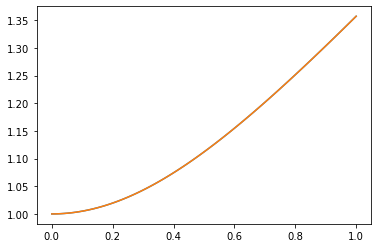

In [6]:
#реализация метода рунге-кутты 3-го порядка аппроксимации
#функция
def f(x, y):
    return x * y**(-2)
#производная функции
def f1(x, y):
    return -2 * x * y ** (-3)
def f_k(k):
    return f(x+a1*h, y_0 + a2*h*k + a3) - k
def f_1_k(k):
    return h*f1(x+a1*h,y_0 + a2*h*k + a3) - 1
y_0 = 1
m = 100
L = 1
h = L / m
x_i = np.arange(0, L+h, h)
y = np.zeros([m+1])
s = 3
#таблица бутчера для МРК 3го порядка
c = np.array([1, 1/3, 1])
a = np.array([[1, 0, 0],
             [0, 1/3, 0],
             [-1/12, 3/4, 1/3]])
b = np.array([-1/12, 3/4, 1/3])
k_i = np.zeros([s])

for sp in range(m+1):
    y[sp] = y_0
    y_0 = y[sp]
    x = x_i[sp]
    a1 = c[0]
    a2 = a[0][0]
    a3 = 0
    k_i[0] = Method(f_k, f_1_k, -990, 1000)
    a1 = c[1]
    a2 = a[1][1]
    k_i[1] = Method(f_k, f_1_k, -990, 1000)
    a1 = c[2]
    a2 = a[2][2]
    a3 = a[2][0] * h * k_i[0] + a[2][1] * h * k_i[1]
    k_i[2] = Method(f_k, f_1_k, -990, 1000)
    delta = 0
    for j in range(s):
        delta += h * b[j] * k_i[j]
    y_0 = y_0 + delta
    #print(sp, k_i[0], k_i[1], k_i[2], y_0)
#print(y)
plt.figure(1)
plt.plot(x_i, y, label = 'model')
plt.figure(1)
plt.plot(x_i, (1.5*np.multiply(x_i, x_i) +1)**(1/3))
#print((np.multiply(x_i, x_i) ** (1/3)))

In [6]:
#нелинейная функция
def F(x):
    return 0.1*math.pow(x,2)-x*math.log(x*a1)
 
#производная нелинейной функции
def F1(x):
    return a1*0.2*x-math.log(x*a1)-1
 
def Method(F, F1, a,b):
    try:
        x0=(a+b)/2
        xn=F(x0)
        xn1=xn-F(xn)/F1(xn)
        while abs(xn1-xn)>math.pow(10,-4):
            xn=xn1 
            xn1=xn-F(xn)/F1(xn)
        return xn1
    except ValueError:
        print ("Value not invalidate")
a1 = 2
print(Method(F, F1,1,100))

44.99730568747817


In [7]:
def Method(F, F1, a,b):
    try:
        x0=(a+b)/2
        xn=F(x0)
        xn1=xn-F(xn)/F1(xn)
        while abs(xn1-xn)>math.pow(10,-4):
            xn=xn1 
            xn1=xn-F(xn)/F1(xn)
        return xn1
    except ValueError:
        print ("Value not invalidate")
def Runge_Kutte_3(f, f1, L, m, y_0):
    def f_k(k):
        return f(x+a1*h, y_0 + a2*h*k + a3) - k
    def f_1_k(k):
        return h*f1(x+a1*h,y_0 + a2*h*k + a3) - 1
    h = L / m
    x_i = np.arange(0, L+h, h)
    y = np.zeros([m+1])
    s = 3
    #таблица бутчера для МРК 3го порядка
    c = np.array([1, 1/3, 1])
    a = np.array([[1, 0, 0],
                 [0, 1/3, 0],
                 [-1/12, 3/4, 1/3]])
    b = np.array([-1/12, 3/4, 1/3])
    k_i = np.zeros([s])
    for sp in range(m+1):
        y[sp] = y_0
        y_0 = y[sp]
        x = x_i[sp]
        a1 = c[0]
        a2 = a[0][0]
        a3 = 0
        k_i[0] = Method(f_k, f_1_k, -990, 1000)
        a1 = c[1]
        a2 = a[1][1]
        k_i[1] = Method(f_k, f_1_k, -990, 1000)
        a1 = c[2]
        a2 = a[2][2]
        a3 = a[2][0] * h * k_i[0] + a[2][1] * h * k_i[1]
        k_i[2] = Method(f_k, f_1_k, -990, 1000)
        delta = 0
        for j in range(s):
            delta += h * b[j] * k_i[j]
        y_0 = y_0 + delta
    return x_i, y
print(Runge_Kutte_3(f, f1, 2, 200, 1)[1])

[1.         1.00005    1.00019996 1.0004498  1.00079936 1.00124844
 1.00179677 1.00244402 1.00318982 1.00403371 1.00497521 1.00601376
 1.00714878 1.00837959 1.0097055  1.01112576 1.01263957 1.01424609
 1.01594443 1.01773366 1.01961282 1.02158091 1.02363689 1.02577969
 1.02800821 1.03032132 1.03271786 1.03519665 1.03775649 1.04039616
 1.04311442 1.04591    1.04878163 1.05172805 1.05474793 1.05784
 1.06100293 1.06423542 1.06753614 1.07090378 1.07433702 1.07783454
 1.08139504 1.08501718 1.08869969 1.09244124 1.09624056 1.10009636
 1.10400737 1.10797233 1.11198999 1.11605912 1.12017849 1.1243469
 1.12856314 1.13282604 1.13713444 1.14148719 1.14588315 1.15032122
 1.1548003  1.15931931 1.16387719 1.16847289 1.1731054  1.17777369
 1.1824768  1.18721373 1.19198356 1.19678533 1.20161814 1.20648109
 1.2113733  1.21629391 1.22124208 1.22621699 1.23121782 1.23624379
 1.24129413 1.24636808 1.25146491 1.25658388 1.26172431 1.2668855
 1.27206678 1.27726748 1.28248698 1.28772465 1.29297987 1.29825205


In [16]:
def Runge_Kutte_3_vec(f, f1, L, m, y_0):
    def f_k(k):
        return f(x+a1*h, y_0_num + a2*h*k + a3) - k
    def f_1_k(k):
        return h*f1(x+a1*h,y_0_num + a2*h*k + a3) - 1
    h = L / m
    x_i = np.arange(0, L+h, h)
    y = np.zeros([m+1])
    s = 3
    #таблица бутчера для МРК 3го порядка
    c = np.array([1, 1/3, 1])
    a = np.array([[1, 0, 0],
                 [0, 1/3, 0],
                 [-1/12, 3/4, 1/3]])
    b = np.array([-1/12, 3/4, 1/3])
    k_i = np.zeros([s])
    for sp in range(m+1):
        y[sp] = y_0[sp]
        y_0_num = y_0[sp]
        x = x_i[sp]
        a1 = c[0]
        a2 = a[0][0]
        a3 = 0
        k_i[0] = Method(f_k, f_1_k, -990, 1000)
        a1 = c[1]
        a2 = a[1][1]
        k_i[1] = Method(f_k, f_1_k, -990, 1000)
        a1 = c[2]
        a2 = a[2][2]
        a3 = a[2][0] * h * k_i[0] + a[2][1] * h * k_i[1]
        k_i[2] = Method(f_k, f_1_k, -990, 1000)
        delta = 0
        for j in range(s):
            delta += h * b[j] * k_i[j]
        y[sp] += delta
    return x_i, y
a = 1
L = 1
m = 100
h = L / m
T = 1
n = 100
t_i = np.arange(0, T+h, h)
tau = T / n
g_h_t = np.zeros([m, n+1])
y_ = 0
def mu(t):
    return 1
def f(t, y):
    return -6 * a / h *y - a ** 2 * tau / h ** 2 * y - a * mu(t)
def f1(t, y):
    return -6 * a / h - a ** 2 * tau / h ** 2
#print(Runge_Kutte_3_vec(f, f1, L, n, g_h_t[0])[1])
for i in range(1, m):
    g_h_t[i] = Runge_Kutte_3_vec(f, f1, T, n, g_h_t[i-1])[1]
print(g_h_t)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00164441 -0.00164441 -0.00164441 ... -0.00164441 -0.00164441
  -0.00164441]
 [-0.00139672 -0.00139672 -0.00139672 ... -0.00139672 -0.00139672
  -0.00139672]
 ...
 [-0.00142914 -0.00142914 -0.00142914 ... -0.00142914 -0.00142914
  -0.00142914]
 [-0.00142914 -0.00142914 -0.00142914 ... -0.00142914 -0.00142914
  -0.00142914]
 [-0.00142914 -0.00142914 -0.00142914 ... -0.00142914 -0.00142914
  -0.00142914]]
